Implementation of AEVB as in the original paper for MNIST.

In [70]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [71]:
n_z = 2 #dimensionality of latent space
n_hid = 100 #number of hidden layers for both the encoder and decoder networks (could be changed to 2 numbers)
M = 100 #minibatch size
L = 1 #number of posterior samples used per data point, can't be changed yet
im_size = 784 #total number of pixels per image, 784 for MNIST

In [72]:
x = tf.placeholder(tf.float32, [None, im_size])
epsilon = tf.placeholder(tf.float32, [None, n_z])

W_theta1 = tf.Variable(tf.zeros([n_z, n_hid]))
b_theta1 = tf.Variable(tf.zeros([n_hid]))
W_theta2 = tf.Variable(tf.zeros([n_hid, 2*im_size])) #the output of the network parametrizes a 784 dimensional normal
#with diagonal covariance matrix, the first half corresponds to the means, the second half to variances
b_theta2 = tf.Variable(tf.zeros([2*im_size]))

W_phi1 = tf.Variable(tf.zeros([im_size, n_hid]))
b_phi1 = tf.Variable(tf.zeros([n_hid]))
W_phi2 = tf.Variable(tf.zeros([n_hid, n_z*2])) #the output of the network parametrizes a n_z dimensional normal
#with diagonal covariance matrix, the first half corresponds to the means, the second half to variances
b_phi2 = tf.Variable(tf.zeros([n_z*2]))

hid_phi = tf.nn.tanh(tf.matmul(x, W_phi1) + b_phi1)
out_phi = tf.matmul(hid_phi,W_phi2) + b_phi2
mu_phi = out_phi[:,:n_z]
sigma2_phi = tf.exp(out_phi[:,n_z:])

z = mu_phi + tf.sqrt(sigma2_phi) * epsilon
hid_theta = tf.nn.tanh(tf.matmul(z, W_theta1) + b_theta1)
out_theta = tf.matmul(hid_theta,W_theta2) + b_theta2
mu_theta = tf.nn.sigmoid(out_theta[:,:im_size])
sigma2_theta = tf.exp(out_theta[:,im_size:])

log_p_theta = -(x - mu_theta) * (x - mu_theta) / (2 * sigma2_theta) - 0.5 * tf.log(2 * np.pi * sigma2_theta)
L = 0.5 * (tf.reduce_sum(1 + tf.log(sigma2_phi) - mu_phi**2 - sigma2_phi)) / M + tf.reduce_mean(log_p_theta)

In [73]:
train_step = tf.train.AdagradOptimizer(0.1).minimize(-L)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [ ]:
for i in range(10000):
    batch = mnist.train.next_batch(M)
    eps = np.random.normal(size=(M,n_z))
    if i%1000 == 0:
        train_L = sess.run(L, feed_dict={x:batch[0], epsilon:eps})
        print("step %d, training loss %g"%(i, train_L))
    sess.run(train_step, feed_dict={x: batch[0], epsilon: eps})

step 0, training loss -1.0343
step 1000, training loss -0.972746
step 2000, training loss -0.913026
step 3000, training loss -0.857023
step 4000, training loss -0.803075
step 5000, training loss -0.75061
step 6000, training loss -0.699883
step 7000, training loss -0.650618
step 8000, training loss -0.602197
step 9000, training loss -0.554852
step 10000, training loss -0.509116
step 11000, training loss -0.460539
step 12000, training loss -0.418537
step 13000, training loss -0.370459
step 14000, training loss -0.330528
step 15000, training loss -0.283438
step 16000, training loss -0.240333
step 17000, training loss -0.20009
step 18000, training loss -0.15463
step 19000, training loss -0.106889
step 20000, training loss -0.060435
step 21000, training loss -0.0265837
step 22000, training loss 0.0106517
step 23000, training loss 0.0406468
step 24000, training loss 0.093221
step 25000, training loss 0.120201
step 26000, training loss 0.173568
step 27000, training loss 0.189283
step 28000, t

step 236000, training loss 2.37582
step 237000, training loss 2.35216
step 238000, training loss 2.35885
step 239000, training loss 2.25925
step 240000, training loss 2.11354
step 241000, training loss 2.29001
step 242000, training loss 2.36732
step 243000, training loss 2.38829
step 244000, training loss 2.01679
step 245000, training loss 2.35955
step 246000, training loss 2.39422
step 247000, training loss 2.3288
step 248000, training loss 2.37136
step 249000, training loss 2.38752
step 250000, training loss 2.3964
step 251000, training loss 2.42596
step 252000, training loss 2.37359
step 253000, training loss 2.35281
step 254000, training loss 2.41663
step 255000, training loss 2.19084
step 256000, training loss 2.40789
step 257000, training loss 2.40105
step 258000, training loss 1.83623
step 259000, training loss 2.3633
step 260000, training loss 2.39442
step 261000, training loss 2.44173
step 262000, training loss 2.37102
step 263000, training loss 2.39164
step 264000, training l

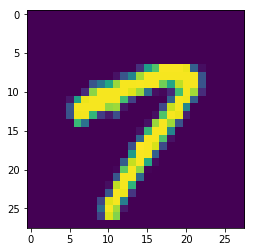

In [67]:
original_image_vec = mnist.train.next_batch(1)[0]
original_image = original_image_vec.reshape(28,28)
plt.imshow(original_image)

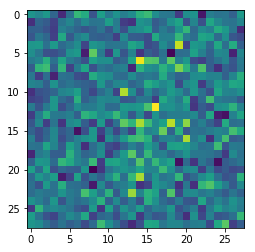

In [68]:
eps = np.random.normal(size=(1,n_z))
mu = sess.run(mu_theta, feed_dict={x:original_image_vec, epsilon:eps})
sigma2 = sess.run(sigma2_theta, feed_dict={x:original_image_vec, epsilon:eps})
sim_image = np.random.normal(mu, sigma2).reshape(28,28)
plt.imshow(sim_image)